# Pymaceuticals Inc.
---

### Analysis

- According to the data it is shown there were 248 mice that were being used in the study
- The dataset before being cleaned had a duplicated mouse B128 which could impact the results
- According to the piechart it is shown that male mice had more drugs than the females 51% to 49%
- 
 

In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_mouse_complete = pd.merge(left=study_results, right=mouse_metadata, on="Mouse ID")
# Display the data table for preview

study_mouse_complete.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [200]:
# Checking the number of mice.
len(study_mouse_complete['Mouse ID'].unique())


249

In [206]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_ids = study_mouse_complete[study_mouse_complete.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()
dupe_ids

array(['g989'], dtype=object)

In [210]:
# Optional: Get all the data for the duplicate mouse ID. 
study_mouse_complete[study_mouse_complete['Mouse ID'].isin(dupe_ids)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [214]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_mouse_complete[study_mouse_complete['Mouse ID'].isin(dupe_ids)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [216]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [218]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = clean_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
ss_mean = summary_stats['Tumor Volume (mm3)'].mean()
ss_median = summary_stats['Tumor Volume (mm3)'].median()
ss_variance = summary_stats['Tumor Volume (mm3)'].var()
ss_sd = summary_stats['Tumor Volume (mm3)'].std()
ss_sem = summary_stats['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({'Mean Tumor Volume': ss_mean,'Median Tumor Volume':ss_median,'Tumor Volume Varience':ss_variance,
                    'Tumor Volume Std. Dev.':ss_sd,'Tumor Colume Std. Err.':ss_sem})
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Colume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [220]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

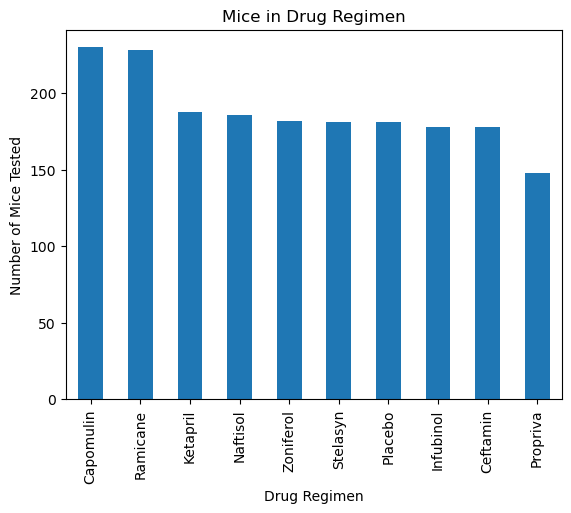

In [222]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar',xlabel='Drug Regimen',ylabel='Number of Mice Tested',title='Mice in Drug Regimen')
plt.show()

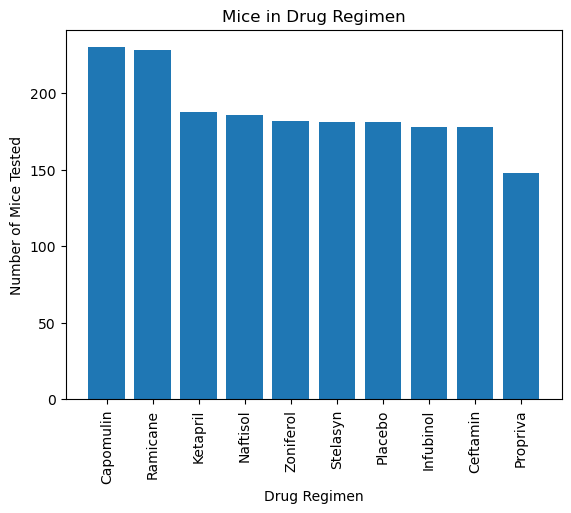

In [224]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index,regimen_counts)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice Tested')
plt.title('Mice in Drug Regimen')
plt.show()

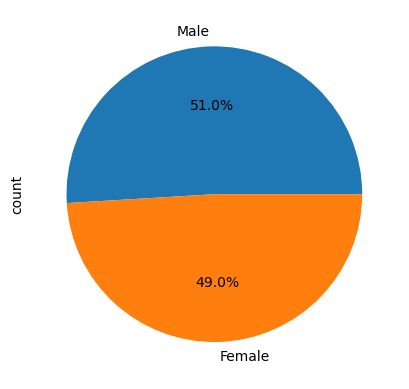

In [226]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_df['Sex'].value_counts()
mice_gender.plot(kind='pie',autopct='%.1f%%')
plt.show()

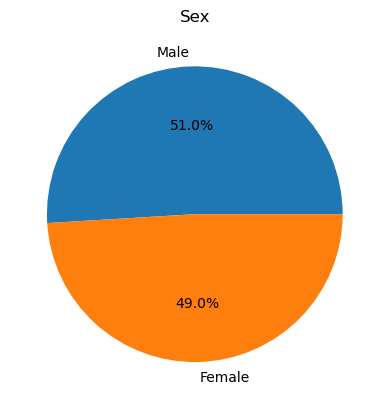

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender,autopct="%.1f%%",labels=mice_gender.index)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [230]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_df = clean_df.groupby(['Mouse ID']).max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_time_df = pd.merge(time_df,clean_df,how='left',on=['Mouse ID','Timepoint'])
tumor_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [252]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_time_df[tumor_time_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'] 
    # add subset 
    tumor_vol_data.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
     #print statements
    print(f"{drug}'s potential outliers:{list(outlier)}")

Capomulin's potential outliers:[]
Ramicane's potential outliers:[]
Infubinol's potential outliers:[36.3213458]
Ceftamin's potential outliers:[]


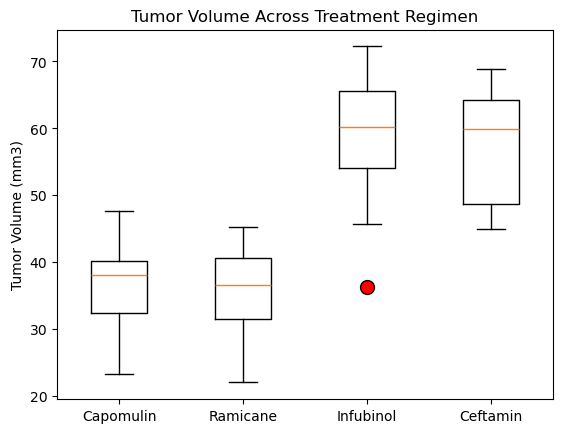

In [254]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data,0,labels=drugs,flierprops={"markerfacecolor":'red','markersize':10})
ax1.set_title('Tumor Volume Across Treatment Regimen')
plt.show()


## Line and Scatter Plots

In [278]:

mouse_df = clean_df[clean_df['Mouse ID'] == 'k403']
mouse_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
505,k403,0,45.000000,0,Ramicane,Male,21,16
506,k403,5,38.825898,0,Ramicane,Male,21,16
507,k403,10,35.014271,1,Ramicane,Male,21,16
508,k403,15,34.223992,1,Ramicane,Male,21,16
509,k403,20,32.997729,1,Ramicane,Male,21,16
510,k403,25,33.464577,1,Ramicane,Male,21,16
511,k403,30,31.099498,1,Ramicane,Male,21,16
512,k403,35,26.546993,1,Ramicane,Male,21,16
513,k403,40,24.365505,1,Ramicane,Male,21,16
514,k403,45,22.050126,1,Ramicane,Male,21,16


<function matplotlib.pyplot.show(close=None, block=None)>

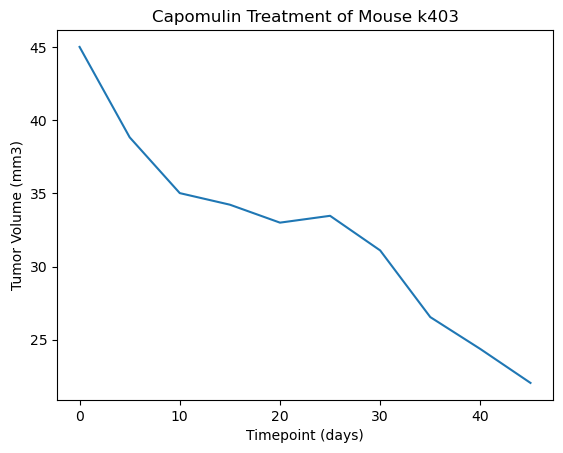

In [280]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse k403')
plt.show

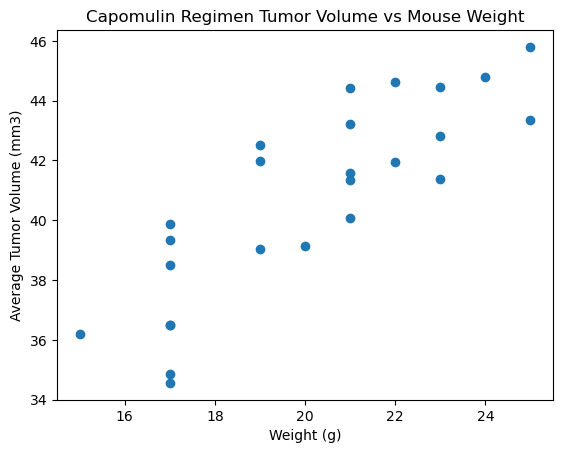

In [282]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df[clean_df['Drug Regimen']=="Capomulin"]
cap_averages = cap_df.groupby(['Mouse ID']).mean(numeric_only=True)
plt.scatter(cap_averages['Weight (g)'],cap_averages['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen Tumor Volume vs Mouse Weight')

plt.show()

## Correlation and Regression

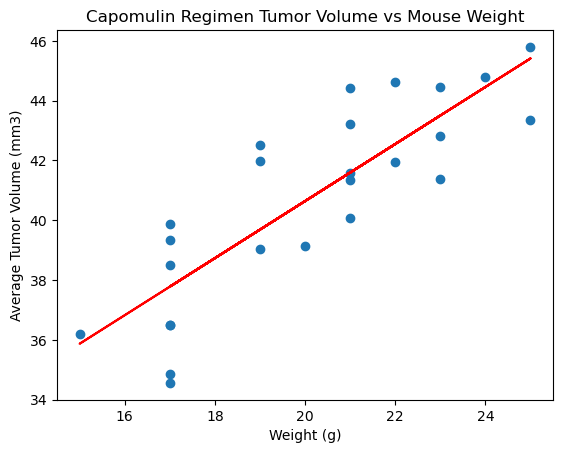

In [286]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_df = clean_df[clean_df['Drug Regimen']=="Capomulin"]
cap_averages = cap_df.groupby(['Mouse ID']).mean(numeric_only=True)

#Calculating the correlation coefficient and linear regression model
(slope,intercept,rvalues,pvalue, stderr) = st.linregress(cap_averages['Weight (g)'],cap_averages['Tumor Volume (mm3)'])
regress_values = cap_averages['Weight (g)'] * slope + intercept

#ploting everything
plt.scatter(cap_averages['Weight (g)'],cap_averages['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen Tumor Volume vs Mouse Weight')

#plotting linear regression line
plt.plot(cap_averages['Weight (g)'],regress_values,"r-")

plt.show()

